In [1]:
import pandas as pd

In [19]:
# 加载 3 张表格
df_employee = pd.read_csv("E:\machine learning\HR Analytics Employee Attrition\Employee.csv")
df_performance = pd.read_csv("E:\machine learning\HR Analytics Employee Attrition\PerformanceRating.csv")
df_education = pd.read_csv("E:\machine learning\HR Analytics Employee Attrition\EducationLevel.csv")
df_satisfaction = pd.read_csv("E:\machine learning\HR Analytics Employee Attrition\SatisfiedLevel.csv")
df_rating = pd.read_csv("E:\machine learning\HR Analytics Employee Attrition\RatingLevel.csv")

# 1️⃣ 精选 DimEmployee 字段（注意 Education 字段名）
employee_cols = [
    "EmployeeID", "Attrition", "Gender", "Age", "Department", "BusinessTravel",
    "MaritalStatus", "DistanceFromHome (KM)", "Salary", "StockOptionLevel", "OverTime",
    "YearsAtCompany", "YearsInMostRecentRole", "YearsSinceLastPromotion",
    "YearsWithCurrManager", "Ethnicity", "Education"
]
df_employee = df_employee[employee_cols]

# 2️⃣ 合并学历名称（EducationLevel）
df_employee = df_employee.merge(
    df_education,
    left_on="Education",
    right_on="EducationLevelID",
    how="left"
)
df_employee.drop(columns=["Education", "EducationLevelID"], inplace=True)

# 3️⃣ 精选绩效字段
performance_cols = [
    "EmployeeID", "EnvironmentSatisfaction", "JobSatisfaction",
    "RelationshipSatisfaction", "WorkLifeBalance",
    "TrainingOpportunitiesWithinYear", "TrainingOpportunitiesTaken",
    "SelfRating", "ManagerRating"
]
df_performance = df_performance[performance_cols]

# 4️⃣ 合并绩效数据
df = df_employee.merge(df_performance, on="EmployeeID", how="left")

# 5️⃣ 可选：满意度映射（数字转文字）
satisfaction_map = df_satisfaction.set_index("SatisfactionID")["SatisfactionLevel"].to_dict()
for col in ["EnvironmentSatisfaction", "JobSatisfaction", "RelationshipSatisfaction", "WorkLifeBalance"]:
    df[col + "_Label"] = df[col].map(satisfaction_map)

# 6️⃣ 可选：评分等级映射
rating_map = df_rating.set_index("RatingID")["RatingLevel"].to_dict()
df["ManagerRating_Label"] = df["ManagerRating"].map(rating_map)
df["SelfRating_Label"] = df["SelfRating"].map(rating_map)

# 7️⃣ 创建派生特征
df["TrainingUtilizationRate"] = df["TrainingOpportunitiesTaken"] / (
    df["TrainingOpportunitiesWithinYear"] + 1e-5
)

# ✅ 输出最终合并数据
df.to_csv("fully_merged_employee_data.csv", index=False)
print("✅ 成功合并所有5个表：文件已保存为 fully_merged_employee_data.csv")

✅ 成功合并所有5个表：文件已保存为 fully_merged_employee_data.csv


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26964\26381532.py:2: SyntaxWarning: invalid escape sequence '\m'
  df_employee = pd.read_csv("E:\machine learning\HR Analytics Employee Attrition\Employee.csv")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26964\26381532.py:3: SyntaxWarning: invalid escape sequence '\m'
  df_performance = pd.read_csv("E:\machine learning\HR Analytics Employee Attrition\PerformanceRating.csv")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26964\26381532.py:4: SyntaxWarn

In [121]:

df = pd.read_csv(r"C:\Users\Lenovo\Documents\Machine\fully_merged_employee_data.csv")  # 你合并后的完整文件

# 精简字段
selected_columns = [
    "EmployeeID", "Attrition", "Gender", "Ethnicity", "Age", "Salary", "StockOptionLevel",
    "OverTime", "YearsAtCompany", "YearsSinceLastPromotion", "Department",
    "BusinessTravel", "EducationLevel", "EnvironmentSatisfaction", "JobSatisfaction",
    "WorkLifeBalance", "TrainingUtilizationRate", "ManagerRating"
]

df_minimal = df[selected_columns]

# 保存简化版数据
df_minimal.to_csv("employee_attrition_data.csv", index=False)
print("✅ 生成简化版数据文件：employee_attrition_data.csv")

✅ 生成简化版数据文件：employee_attrition_data.csv


In [123]:
# ✅ 1. 映射 Attrition 为 0/1（如果还是字符串）
if df["Attrition"].dtype == "object":
    df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# ✅ 2. 删除 Attrition 中不是 0/1 的值（也自动排除 NaN）
df = df[df["Attrition"].isin([0, 1])]

# ✅ 3. 对数值列：中位数填充
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# ✅ 4. 对分类列：众数填充（先移除 Attrition，避免干扰）
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
if "Attrition" in categorical_cols:
    categorical_cols.remove("Attrition")
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# ✅ 5. 再次确认 Attrition 是整数类型（防止字符串 0/1）
df["Attrition"] = df["Attrition"].astype(int)

# ✅ 6. 保存处理后的数据
df.to_csv(r"C:\Users\Lenovo\Documents\Machine\preprocessed_employee_data.csv", index=False)
print("✅ 数据预处理完成，并保存为 preprocessed_employee_data.csv")

✅ 数据预处理完成，并保存为 preprocessed_employee_data.csv


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

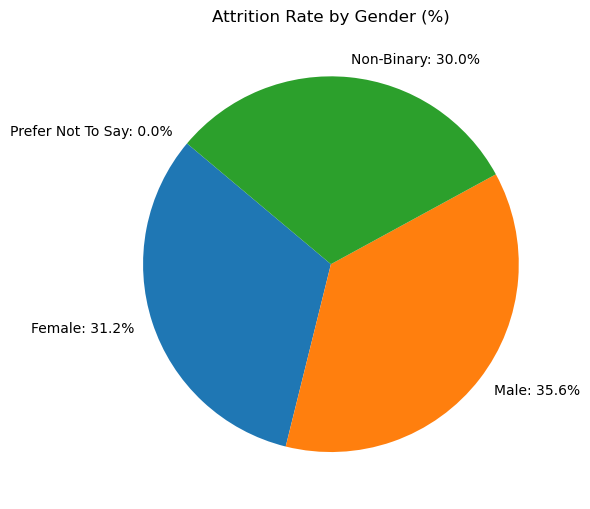

In [127]:
df = pd.read_csv("preprocessed_employee_data.csv")

# 1. 性别与流失率
# 计算每个性别的平均流失率（百分比）
gender_attrition_rate = df.groupby("Gender")["Attrition"].mean() * 100

# 绘制饼图
plt.figure(figsize=(6, 6))
plt.pie(gender_attrition_rate,
        labels=[f"{gender}: {rate:.1f}%" for gender, rate in gender_attrition_rate.items()],
        autopct='',  # 不显示自动百分比，用自定义标签更清晰
        startangle=140)
plt.title("Attrition Rate by Gender (%)")
plt.tight_layout()
plt.show()

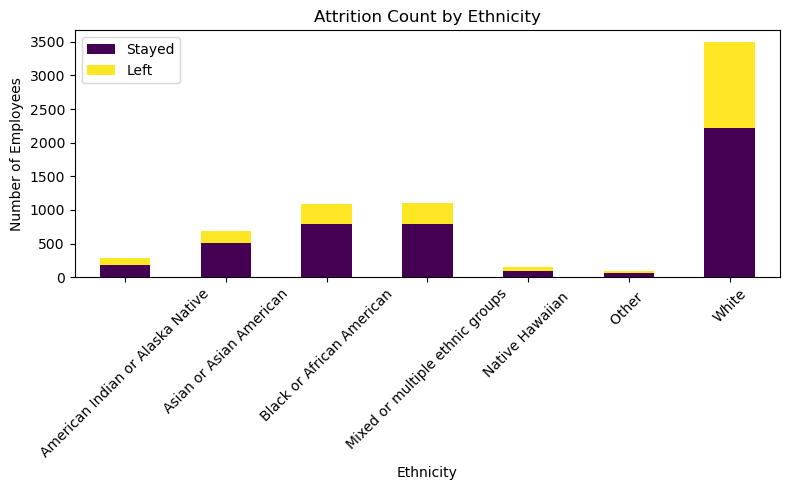

In [131]:
#  2. 【种族与流失】堆积条形图更好（显示各族流失/未流失数量）
ethnicity_counts = pd.crosstab(df["Ethnicity"], df["Attrition"])
ethnicity_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Attrition Count by Ethnicity")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(["Stayed", "Left"])
plt.tight_layout()
plt.show()

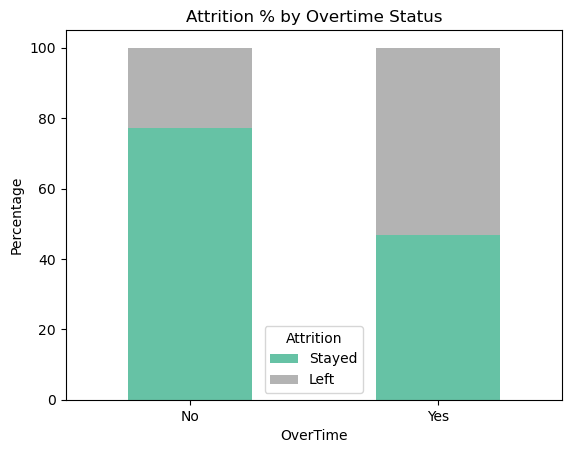

In [133]:
#3.【加班与流失】用百分比柱状图（显示每组的流失比例）
overtime_data = pd.crosstab(df["OverTime"], df["Attrition"], normalize="index") * 100
overtime_data.plot(kind="bar", stacked=True, colormap="Set2")
plt.title("Attrition % by Overtime Status")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(["Stayed", "Left"], title="Attrition")
plt.show()

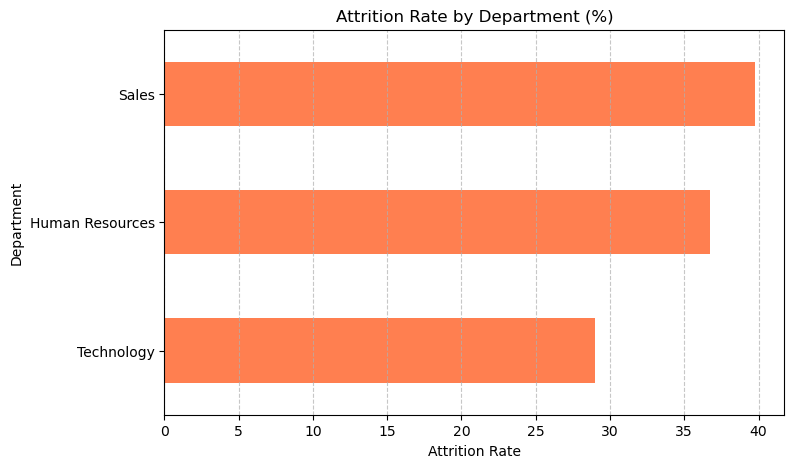

In [135]:
#4. 【部门 vs 流失率】用排序后的百分比柱状图（便于对比）
department_attrition = df[df["Attrition"] == 1]["Department"].value_counts()
department_total = df["Department"].value_counts()
department_rate = (department_attrition / department_total * 100).sort_values()

department_rate.plot(kind="barh", color="coral", figsize=(8, 5))
plt.title("Attrition Rate by Department (%)")
plt.xlabel("Attrition Rate")
plt.ylabel("Department")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

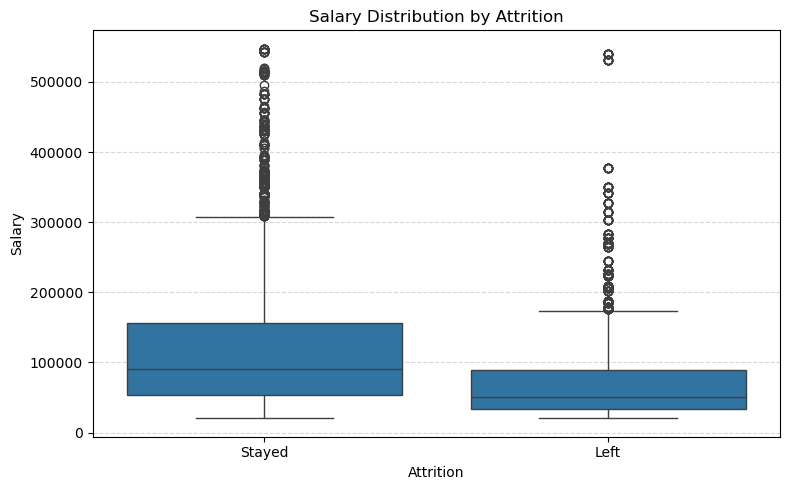

In [147]:
#5. Salary对于流失的影响的对比图
# 可视化函数：箱线图
df["Attrition"] = df["Attrition"].astype(int)

# 清除 Salary 或 Attrition 的缺失值（保险处理）
temp_df = df[["Attrition", "Salary"]].dropna()
temp_df = temp_df[temp_df["Attrition"].isin([0, 1])]

# 画箱线图
plt.figure(figsize=(8, 5))
sns.boxplot(x="Attrition", y="Salary", data=temp_df)
plt.xticks([0, 1], ["Stayed", "Left"])
plt.title("Salary Distribution by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Salary")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

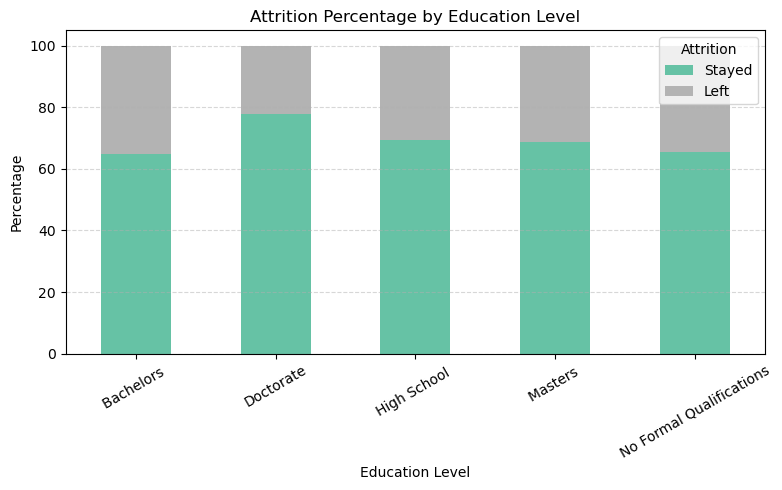

In [149]:
#6. EducationLevel对于流失的影响的对比图
df["Attrition"] = df["Attrition"].astype(int)

# 创建 EducationLevel 与 Attrition 的交叉表（按行归一化为百分比）
ctab = pd.crosstab(df["EducationLevel"], df["Attrition"], normalize="index") * 100

# 确保顺序：0 = Stayed, 1 = Left
ctab = ctab[[0, 1]]

# 绘图
ctab.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Set2")
plt.title("Attrition Percentage by Education Level")
plt.ylabel("Percentage")
plt.xlabel("Education Level")
plt.legend(["Stayed", "Left"], title="Attrition")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

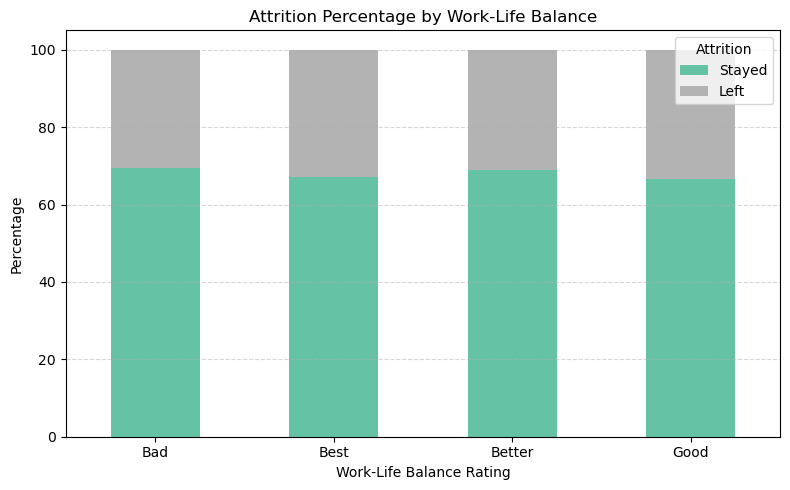

In [157]:
#7.WorkLifeBalance和流失关系的对比图
balance_map = {
    1: "Bad",
    2: "Good",
    3: "Better",
    4: "Best"
}
df["WorkLifeBalance"] = df["WorkLifeBalance"].map(balance_map)

# 创建交叉表（按每个等级归一化）
ctab = pd.crosstab(df["WorkLifeBalance"], df["Attrition"], normalize="index") * 100
ctab = ctab[[0, 1]]  # 确保“Stayed”在前，“Left”在后

# 绘图
ctab.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Set2")
plt.title("Attrition Percentage by Work-Life Balance")
plt.ylabel("Percentage")
plt.xlabel("Work-Life Balance Rating")
plt.legend(["Stayed", "Left"], title="Attrition")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
